In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
    
%matplotlib inline

# Data organizing

In [2]:
#uploading enrolees data
data = pd.read_csv('data/aug_train.csv')

In [3]:
data.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [4]:
print(data.shape)

(19158, 14)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Features:

enrollee_id: Unique ID for candidate    
city: City code(Categorial)    
city_ development _index : Developement index of the city (scaled)(Categorial)  
gender: Gender of candidate(Categorial)   
relevent_experience: Relevant experience of candidate(Categorial)      
enrolled_university: Type of University course enrolled if any(Categorial)   
education_level: Education level of candidate(Categorial)   
major_discipline :Education major discipline of candidate(Categorial)   
experience: Candidate total experience in years(Ordinal)   
company_size: No of employees in current employer's company(Ordinal)   
company_type : Type of current employer(Categorial)   
lastnewjob: Difference in years between previous job and current job(Ordinal)   
training_hours: training hours completed(Numerical)   
target: 0 – Not looking for job change, 1 – Looking for a job change(Binary)   

In [6]:
(data.target.value_counts(normalize=True)).map("{:.2%}".format)

0.0    75.07%
1.0    24.93%
Name: target, dtype: object

In [7]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

# Visualising

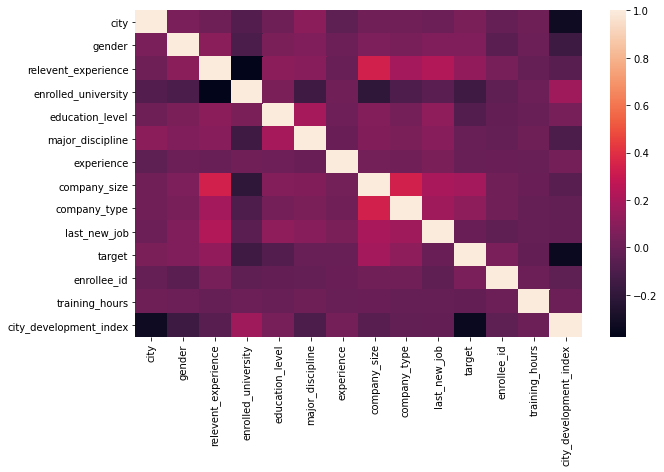

In [8]:
def LabelEncoder(df):
    features = ['enrollee_id', 'training_hours', 'city_development_index']
    df_save = df[features]
    df = df.drop(columns=features)
    for i in df.columns:
        df[i] = df[i].map(str)
    lb = preprocessing.LabelEncoder()
    df = df.apply(lb.fit_transform)
    df[features] = df_save[features]
    return df
data = LabelEncoder(data)
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr())

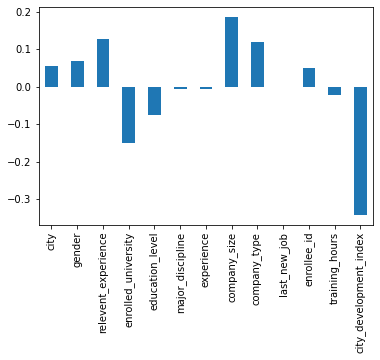

In [9]:
data.corr()['target'].drop(labels=['target']).plot.bar()

# Data preparations

Dropping the features with the lowest correlation to the target

In [10]:
features_to_drop = ['major_discipline', 'experience', 'last_new_job', 'training_hours', 'enrollee_id']
data.drop(columns=features_to_drop, inplace = True)

Create dummies feature for the categorial features

In [11]:
gender = pd.get_dummies(data['gender'], drop_first=True)
relevant_experience = pd.get_dummies(data['relevent_experience'], drop_first=True)
enrolled_university = pd.get_dummies(data['enrolled_university'], drop_first=True)
education_level = pd.get_dummies(data['education_level'], drop_first=True)
company_size = pd.get_dummies(data['company_size'], drop_first=True)
company_type = pd.get_dummies(data['company_type'], drop_first=True)
features_to_drop = ['gender' ,'relevent_experience', 'enrolled_university', 'education_level', 'company_size', 'company_type']
data.drop(columns=features_to_drop, inplace = True)
data = pd.concat([data, gender, relevant_experience, enrolled_university, company_size, company_type], axis=1)

# Models Training And Evaluating

In [12]:
knn_clf = KNeighborsClassifier(n_neighbors=10)
x = data.drop(['target'], axis=1)
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
knn_clf.fit(x_train, y_train)
prediction_lr = knn_clf.predict(x_test)
print(classification_report(y_test, prediction_lr))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      3584
           1       0.56      0.37      0.44      1206

    accuracy                           0.77      4790
   macro avg       0.68      0.64      0.65      4790
weighted avg       0.75      0.77      0.75      4790



In [13]:
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(x_train, y_train)
prediction_lr = forest_clf.predict(x_test)
print(classification_report(y_test, prediction_lr))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      3584
           1       0.53      0.49      0.51      1206

    accuracy                           0.76      4790
   macro avg       0.68      0.67      0.68      4790
weighted avg       0.76      0.76      0.76      4790



Evaluate KNN model using cross validation and confusion matrix

Text(0.5, 1.0, 'Confusion matrix for KNN Classifier')

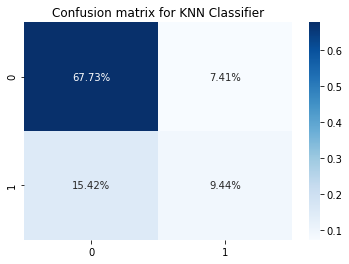

In [14]:
from sklearn.metrics import plot_confusion_matrix
y_train_pred = cross_val_predict(knn_clf, x_train, y_train, cv=5)
cm = confusion_matrix(y_train, y_train_pred, normalize='all')
df_cm = pd.DataFrame(cm, columns=np.unique(y_train), index = np.unique(y_train))
ax = sns.heatmap(df_cm, cmap="Blues", annot=True,  fmt=".2%")
ax.set_title('Confusion matrix for KNN Classifier')

Evaluate RandomForest model using cross validation

Text(0.5, 1.0, 'Confusion matrix for Random forest Classifier')

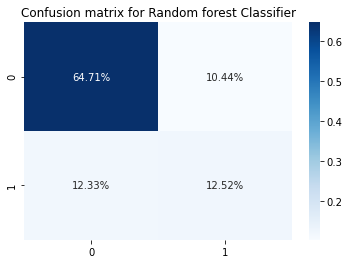

In [15]:
y_train_pred = cross_val_predict(forest_clf, x_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)
cm = confusion_matrix(y_train, y_train_pred, normalize='all')
df_cm = pd.DataFrame(cm, columns=np.unique(y_train), index = np.unique(y_train))
ax = sns.heatmap(df_cm, cmap="Blues", annot=True,  fmt=".2%")
ax.set_title('Confusion matrix for Random forest Classifier')

# Fine Tuning

Searching for the best combination of the hyperparameters

In [16]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':[4,5,6,7,10,15,20],
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree'],
              'n_jobs':[-1]}

grid_search = GridSearchCV(knn_clf, param_grid=parameters, cv=5)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
prediction_lr = grid_search.predict(x_test)

{'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': -1, 'n_neighbors': 15}


In [17]:
print(classification_report(y_test, prediction_lr))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      3584
           1       0.56      0.48      0.51      1206

    accuracy                           0.77      4790
   macro avg       0.70      0.68      0.68      4790
weighted avg       0.76      0.77      0.77      4790



Evaluate the KNN model after fine tuning

Text(0.5, 1.0, 'Confusion matrix for KNN Classifier')

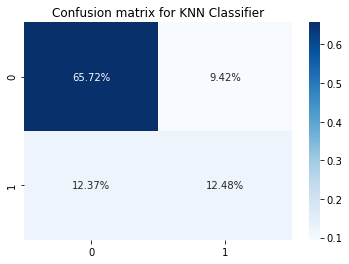

In [18]:
knn_clf = KNeighborsClassifier(n_neighbors=15, leaf_size = 3, algorithm = 'auto' ,n_jobs = -1)
y_train_pred = cross_val_predict(knn_clf, x_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)
cm = confusion_matrix(y_train, y_train_pred, normalize='all')
df_cm = pd.DataFrame(cm, columns=np.unique(y_train), index = np.unique(y_train))
ax = sns.heatmap(df_cm, cmap="Blues", annot=True,  fmt=".2%")
ax.set_title('Confusion matrix for KNN Classifier')

Executing randomized search for the best hyperparameters combination

In [19]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}
grid_search = RandomizedSearchCV(estimator = forest_clf,param_distributions = random_grid, return_train_score = True)

Search the best features combination for the model

In [20]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(C=0.01, penalty="l1", dual=False))),
  ('classification', grid_search)
])
clf.fit(x_train, y_train)
prediction_lr = clf.predict(x_test)
print(classification_report(y_test, prediction_lr))
print(clf.steps[1][1].best_estimator_.feature_importances_)

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      3584
           1       0.57      0.54      0.55      1206

    accuracy                           0.78      4790
   macro avg       0.71      0.70      0.70      4790
weighted avg       0.78      0.78      0.78      4790

[0.17580731 0.51309739 0.00972645 0.01069445 0.02502351 0.02979687
 0.00596086 0.00465455 0.12588078 0.00695723 0.09240059]


Showing the precision of our model

In [21]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, prediction_lr)

0.5661700262927257

In [22]:
probs = clf.predict_proba(x_test)

Showing roc score for formal model evalution of the plot below

In [23]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, probs[:,1])

0.7804609532323501

Showing roc curve plot

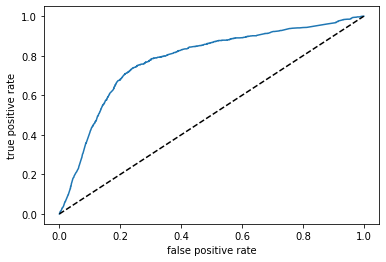

In [24]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs[:,1])
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plot_roc_curve(fpr, tpr)

Showing roc curve plot after thresholds

array([2, 1, 0])

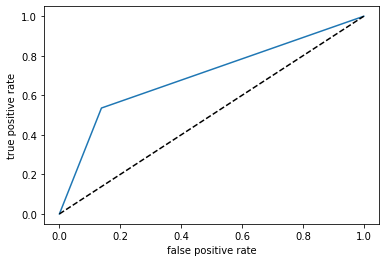

In [25]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, prediction_lr)
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plot_roc_curve(fpr, tpr)
thresholds

Using dummy classifier for models comparison

In [26]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="constant", constant=1)
dummy_clf.fit(x_train, y_train)
y_test_pred = dummy_clf.predict(x_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3584
           1       0.25      1.00      0.40      1206

    accuracy                           0.25      4790
   macro avg       0.13      0.50      0.20      4790
weighted avg       0.06      0.25      0.10      4790



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
